# Chinook Database Analysis Project


### loading the Data

In [2]:
%load_ext sql
%sql sqlite:///Chinook_Sqlite.sqlite


### Exploring Tables

In [3]:
%%sql
SELECT name FROM sqlite_master WHERE type='table';


 * sqlite:///Chinook_Sqlite.sqlite
Done.


name
Album
Artist
Customer
Employee
Genre
Invoice
InvoiceLine
MediaType
Playlist
PlaylistTrack


In [4]:
%%sql
SELECT * FROM customer LIMIT 5;


 * sqlite:///Chinook_Sqlite.sqlite
Done.


CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


### Sales & Revenue Analysis

#### Which artist has the highest total sales revenue?

In [5]:
artist_sales_result = %sql SELECT ar.name AS artist_name, SUM(il.unitprice * il.quantity) AS total_revenue \
FROM invoiceline AS il \
JOIN track AS t ON il.trackid = t.trackid \
JOIN album AS al ON t.albumid = al.albumid \
JOIN artist AS ar ON al.artistid = ar.artistid \
GROUP BY ar.name \
ORDER BY total_revenue DESC \
LIMIT 10;

artist_sales_df = artist_sales_result.DataFrame()
artist_sales_df

 * sqlite:///Chinook_Sqlite.sqlite
Done.


,artist_name,total_revenue
0,Iron Maiden,138.60
1,U2,105.93
2,Metallica,90.09
3,Led Zeppelin,86.13
4,Lost,81.59
5,The Office,49.75
6,Os Paralamas Do Sucesso,44.55
7,Deep Purple,43.56
8,Faith No More,41.58
9,Eric Clapton,39.60


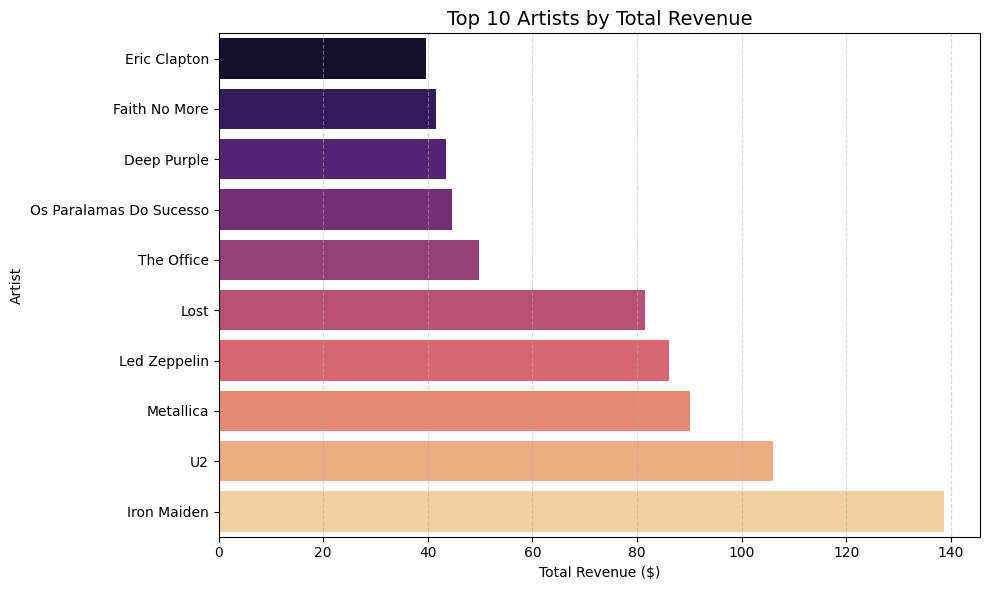

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

artist_sales_df = artist_sales_df.sort_values(by='total_revenue', ascending=True)  

plt.figure(figsize=(10, 6))
sns.barplot(x='total_revenue', y='artist_name', data=artist_sales_df, palette='magma')

plt.title('Top 10 Artists by Total Revenue', fontsize=14)
plt.xlabel('Total Revenue ($)')
plt.ylabel('Artist')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### Insight

###### Top artists like Iron Maiden and U2 significantly drive revenue, indicating strong demand for rock/metal, with "The Office" also showing unexpected success.

______________________________________________

#### Which genres generate the most revenue?

In [17]:
genre_sales_result = %sql SELECT g.name AS genre_name, SUM(il.unitprice * il.quantity) AS total_genre_revenue \
FROM invoiceline AS il \
JOIN track AS t ON il.trackid = t.trackid \
JOIN genre AS g ON t.genreid = g.genreid \
GROUP BY g.name \
ORDER BY total_genre_revenue DESC;

genre_sales_df = genre_sales_result.DataFrame()
genre_sales_df

 * sqlite:///Chinook_Sqlite.sqlite
Done.


,genre_name,total_genre_revenue
0,Rock,826.65
1,Latin,382.14
2,Metal,261.36
3,Alternative & Punk,241.56
4,TV Shows,93.53
5,Jazz,79.20
6,Blues,60.39
7,Drama,57.71
8,R&B/Soul,40.59
9,Classical,40.59


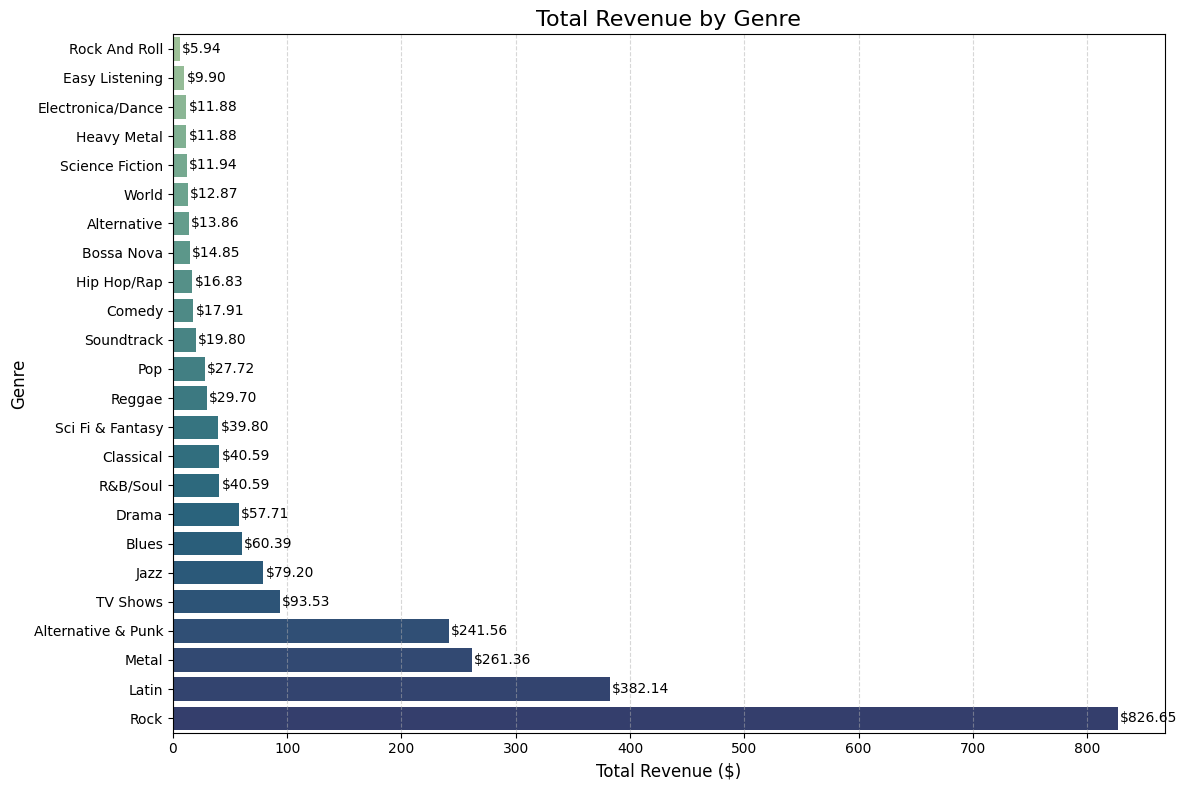

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

genre_sales_df = genre_sales_df.sort_values(by='total_genre_revenue', ascending=True)

plt.figure(figsize=(12, 8))
sns.barplot(x='total_genre_revenue', y='genre_name', data=genre_sales_df, palette='crest')

plt.title('Total Revenue by Genre', fontsize=16)
plt.xlabel('Total Revenue ($)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

for index, value in enumerate(genre_sales_df['total_genre_revenue']):
    plt.text(value + 2, index, f"${value:.2f}", va='center')

plt.tight_layout()
plt.show()


#### Insight

###### The company's revenue is heavily concentrated in Rock and Latin music, but there's a healthy contribution from a wide array of other genres, including non-music content.

______________________________________

#### What is the average order value (AOV)?

In [42]:
%%sql

SELECT AVG(total) AS average_order_value
FROM invoice;

 * sqlite:///Chinook_Sqlite.sqlite
Done.


average_order_value
5.651941747572815


#### Insight

###### The average order value is low ($5.65), meaning customers typically make small purchases, often single tracks.

_________________________________

### Which media types are most commonly sold?

In [43]:
media_type_result = %sql SELECT mt.name AS media_type_name, COUNT(il.invoicelineid) AS total_sales_count \
FROM invoiceline AS il \
JOIN track AS t ON il.trackid = t.trackid \
JOIN mediatype AS mt ON t.mediatypeid = mt.mediatypeid \
GROUP BY mt.name \
ORDER BY total_sales_count DESC;

media_type_df = media_type_result.DataFrame()
media_type_df

 * sqlite:///Chinook_Sqlite.sqlite
Done.


,media_type_name,total_sales_count
0,MPEG audio file,1976
1,Protected AAC audio file,146
2,Protected MPEG-4 video file,111
3,Purchased AAC audio file,4
4,AAC audio file,3


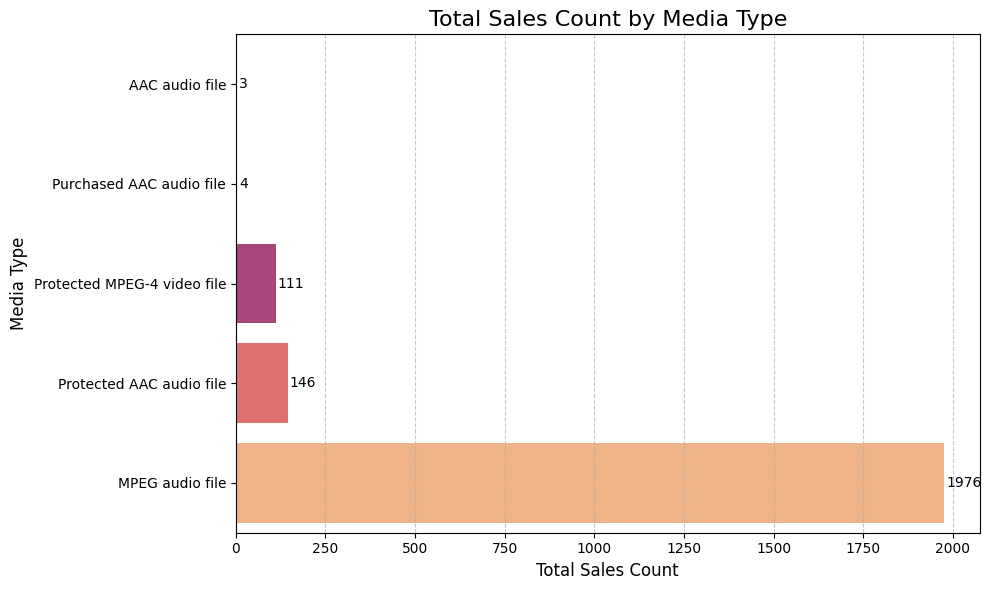

<Figure size 640x480 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

media_type_df = media_type_df.sort_values(by='total_sales_count', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='total_sales_count', y='media_type_name', data=media_type_df, palette='magma')

plt.title('Total Sales Count by Media Type', fontsize=16)
plt.xlabel('Total Sales Count', fontsize=12)
plt.ylabel('Media Type', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for index, value in enumerate(media_type_df['total_sales_count']):
    plt.text(value + 5, index, str(value), va='center')

plt.tight_layout()
plt.show()

media_type_sales_plot = plt.gcf()


#### Insight

###### The company's sales are heavily concentrated in MPEG audio files, highlighting their importance in the product catalog. This suggests that the current infrastructure and content focus are well-aligned with customer preferences for this format.

________________________________________________________

### Customer Analysis

#### Which customers have spent the most money in total?

In [21]:
top_customers_result = %sql SELECT c.firstname, c.lastname, SUM(i.total) AS total_spent \
FROM customer AS c \
JOIN invoice AS i ON c.customerid = i.customerid \
GROUP BY c.customerid, c.firstname, c.lastname \
ORDER BY total_spent DESC \
LIMIT 10;

top_customers_df = top_customers_result.DataFrame()
top_customers_df

 * sqlite:///Chinook_Sqlite.sqlite
Done.


,FirstName,LastName,total_spent
0,Helena,Holý,49.62
1,Richard,Cunningham,47.62
2,Luis,Rojas,46.62
3,Ladislav,Kovács,45.62
4,Hugh,O'Reilly,45.62
5,Frank,Ralston,43.62
6,Julia,Barnett,43.62
7,Fynn,Zimmermann,43.62
8,Astrid,Gruber,42.62
9,Victor,Stevens,42.62


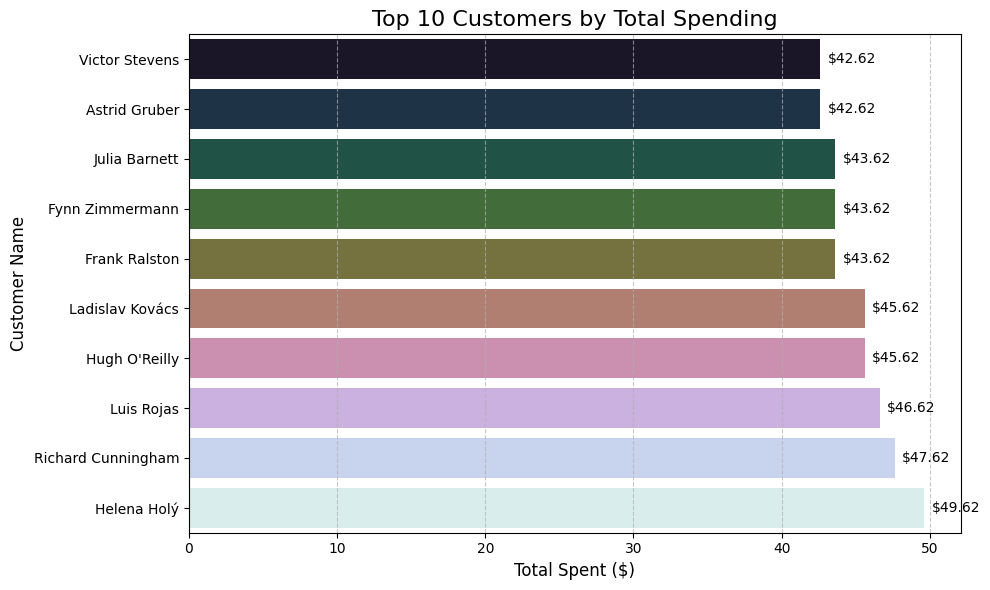

<Figure size 640x480 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

top_customers_df['customer_name'] = top_customers_df['FirstName'] + ' ' + top_customers_df['LastName']

top_customers_df = top_customers_df.sort_values(by='total_spent', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='total_spent', y='customer_name', data=top_customers_df, palette='cubehelix')

plt.title('Top 10 Customers by Total Spending', fontsize=16)
plt.xlabel('Total Spent ($)', fontsize=12)
plt.ylabel('Customer Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for index, value in enumerate(top_customers_df['total_spent']):
    plt.text(value + 0.5, index, f"${value:.2f}", va='center')

plt.tight_layout()
plt.show()

top_customers_plot = plt.gcf()


#### Insight

###### The company's customer spending is fairly distributed among its top customers, without significant individual outliers.

___________________________________

#### How many customers have not made a purchase in the last year?

In [11]:
%%sql

SELECT
    COUNT(c.customerid) AS customers_without_recent_purchase
FROM
    customer AS c
LEFT JOIN
    invoice AS i ON c.customerid = i.customerid
    AND i.invoicedate >= date('now', '-1 year')
WHERE
    i.invoiceid IS NULL;

 * sqlite:///Chinook_Sqlite.sqlite
Done.


customers_without_recent_purchase
59


#### Insight

###### 59 customers are inactive (no purchase in the last year), signaling a key retention challenge.

_______________________________________

#### What is the distribution of customer spending (e.g., how many customers have spent over $70, between $40 and $70, etc.)?

In [25]:
spending_distribution_result = %sql WITH CustomerSpending AS ( \
    SELECT customerid, SUM(total) AS totalspent \
    FROM invoice \
    GROUP BY customerid \
) \
SELECT \
    CASE \
        WHEN totalspent > 70 THEN 'High Spender' \
        WHEN totalspent BETWEEN 40 AND 70 THEN 'Medium Spender' \
        ELSE 'Low Spender' \
    END AS spendingcategory, \
    COUNT(customerid) AS number_of_customers \
FROM CustomerSpending \
GROUP BY spendingcategory;

spending_distribution_df = spending_distribution_result.DataFrame()
spending_distribution_df

 * sqlite:///Chinook_Sqlite.sqlite
Done.


,spendingcategory,number_of_customers
0,Low Spender,45
1,Medium Spender,14


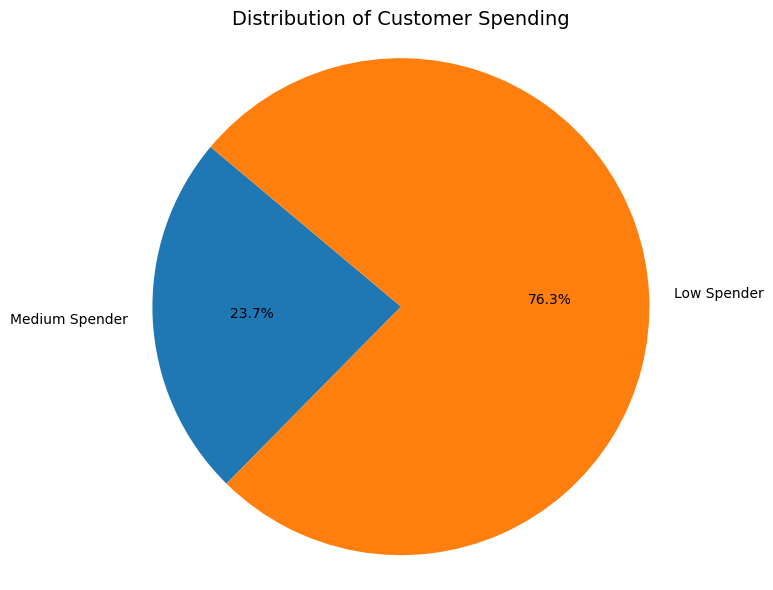

<Figure size 640x480 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

category_order = ['High Spender', 'Medium Spender', 'Low Spender']
spending_distribution_df['spendingcategory'] = pd.Categorical(
    spending_distribution_df['spendingcategory'],
    categories=category_order,
    ordered=True
)
spending_distribution_df = spending_distribution_df.sort_values('spendingcategory')

labels = spending_distribution_df['spendingcategory']
sizes = spending_distribution_df['number_of_customers']

plt.figure(figsize=(8, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
)

plt.title('Distribution of Customer Spending', fontsize=14)
plt.axis('equal')  
plt.tight_layout()
plt.show()

spending_distribution_plot = plt.gcf()


#### Insight

###### The customer spending distribution is heavily weighted towards low-value customers, indicating a need to focus on strategies to increase average customer spending.

_________________________________________

### Employee & Performance Analysis

#### Which employee (support representative) is assigned to the most valuable customers?

In [31]:
rep_spending_result = %sql SELECT e.firstname, e.lastname, SUM(i.total) AS total_customer_spending \
FROM employee AS e \
JOIN customer AS c ON e.employeeid = c.supportrepid \
JOIN invoice AS i ON c.customerid = i.customerid \
GROUP BY e.employeeid, e.firstname, e.lastname \
ORDER BY total_customer_spending DESC;

rep_spending_df = rep_spending_result.DataFrame()
rep_spending_df

 * sqlite:///Chinook_Sqlite.sqlite
Done.


,FirstName,LastName,total_customer_spending
0,Jane,Peacock,833.04
1,Margaret,Park,775.40
2,Steve,Johnson,720.16


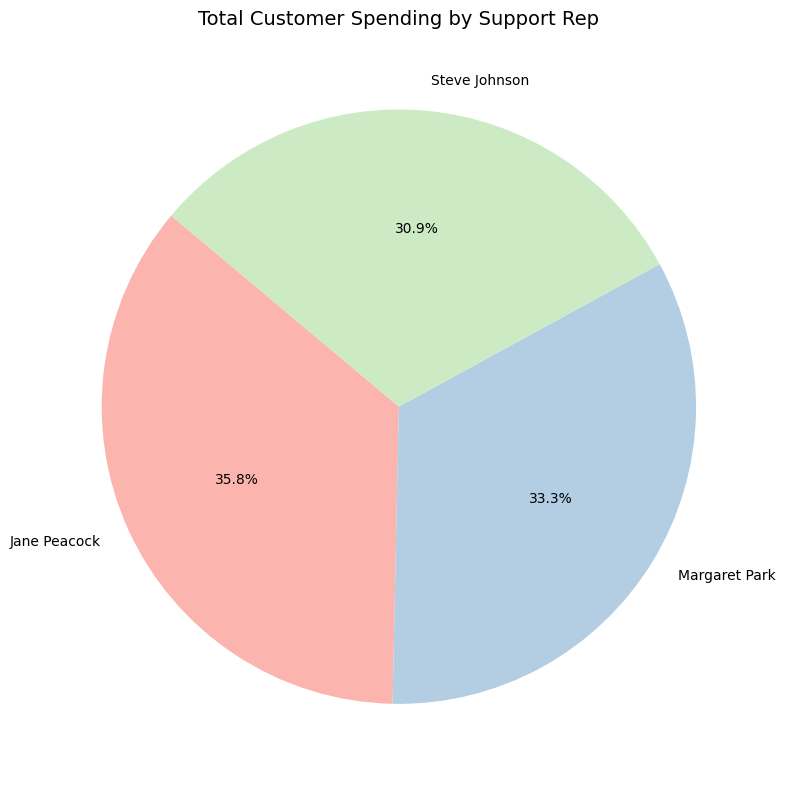

<Figure size 640x480 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt

rep_spending_df['employee_name'] = rep_spending_df['FirstName'] + ' ' + rep_spending_df['LastName']

plt.figure(figsize=(8, 8))
plt.pie(
    rep_spending_df['total_customer_spending'],
    labels=rep_spending_df['employee_name'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)
plt.title('Total Customer Spending by Support Rep', fontsize=14)
plt.axis('equal')  # تخلي الدايرة مش بيضاوية
plt.tight_layout()
plt.show()

rep_spending_pie_plot = plt.gcf()


#### Insight

##### Jane Peacock is currently managing the most valuable customer base, making her a key contributor to the company's revenue through her customer assignments.

____________________

#### How does the number of customers per support representative compare to their total sales?

In [41]:
%%sql

SELECT
    e.firstname,
    e.lastname,
    COUNT(c.customerid) AS number_of_customers,
    SUM(i.total) AS total_sales_from_customers
FROM
    employee AS e
JOIN
    customer AS c ON e.employeeid = c.supportrepid
JOIN
    invoice AS i ON c.customerid = i.customerid
GROUP BY
    e.employeeid, e.firstname, e.lastname
ORDER BY
    total_sales_from_customers DESC;

 * sqlite:///Chinook_Sqlite.sqlite
Done.


FirstName,LastName,number_of_customers,total_sales_from_customers
Jane,Peacock,146,833.04
Margaret,Park,140,775.4
Steve,Johnson,126,720.16


#### Insight

###### Support reps with more customers (e.g., Jane Peacock) correlate with higher total sales.

________________________

### Content & Product Analysis

#### What are the top 5 most popular playlists, based on the number of tracks they contain?

In [38]:
top_playlists_result = %sql SELECT p.name, COUNT(pt.trackid) AS number_of_tracks \
FROM playlist AS p \
JOIN playlisttrack AS pt ON p.playlistid = pt.playlistid \
GROUP BY p.name \
ORDER BY number_of_tracks DESC \
LIMIT 5;

top_playlists_df = top_playlists_result.DataFrame()
top_playlists_df

 * sqlite:///Chinook_Sqlite.sqlite
Done.


,Name,number_of_tracks
0,Music,6580
1,90’s Music,1477
2,TV Shows,426
3,Classical,75
4,Brazilian Music,39


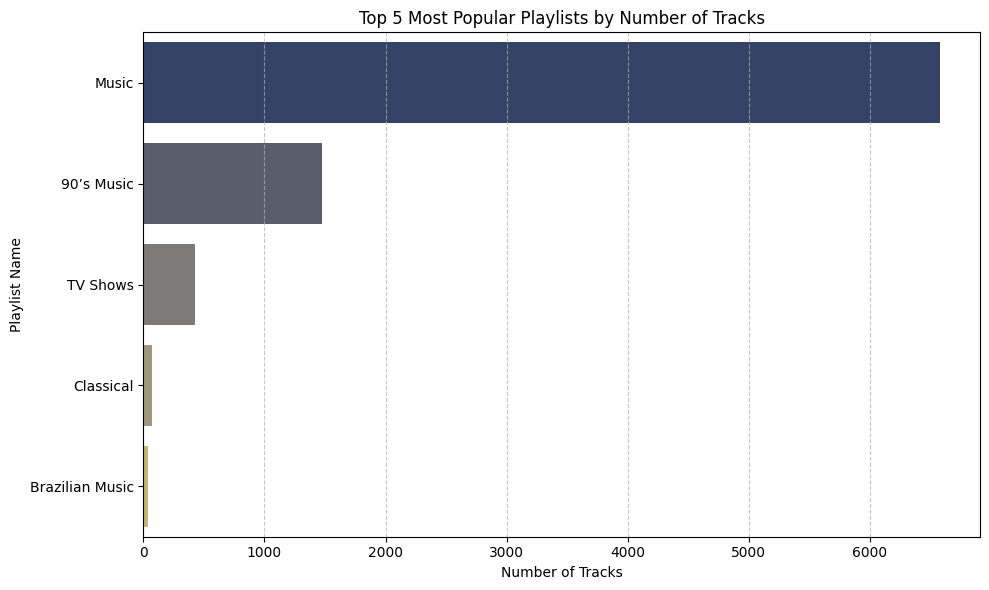

<Figure size 640x480 with 0 Axes>

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# ترتيب البيانات تنازليًا (احتياطي لو محتاج)
top_playlists_df = top_playlists_df.sort_values(by='number_of_tracks', ascending=False)

# رسم البار تشارت
plt.figure(figsize=(10, 6))
sns.barplot(
    x='number_of_tracks',
    y='Name',
    data=top_playlists_df,
    palette='cividis'
)

plt.title('Top 5 Most Popular Playlists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Playlist Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# تخزين الشكل في متغير لو حبيت تستخدمه بعدين
top_playlists_plot = plt.gcf()


#### Insight

###### "Music" is a huge general playlist, while "90's Music" and "TV Shows" highlight demand for specific, curated content. Focus on creating more such targeted playlists.

___________________________________

#### What is the average number of tracks per album?

In [16]:
%%sql

SELECT
    AVG(track_count) AS average_tracks_per_album
FROM (
    SELECT
        COUNT(trackid) AS track_count
    FROM
        track
    GROUP BY
        albumid
) AS track_counts_per_album;


 * sqlite:///Chinook_Sqlite.sqlite
Done.


average_tracks_per_album
10.095100864553315


#### Insight

###### The average number of tracks per album is approximately 10.1. This suggests that the company's music catalog generally adheres to a standard album length, typically around 10 tracks.

____________________

## Recommendations

- Focus on Rock/Latin content & MPEG format.

- Boost low average order value via bundles/subscriptions.

- Re-engage inactive customers.

- Create more targeted playlists (like "90s Music").

- Leverage top support reps (e.g., Jane Peacock) and their customer management strategies.